# 1. Frequent Category Imputation

*** 1. IT IS USED ONLY FOR THE VARIABLES WHICH ARE MISSING IN LESS QUANTITY 
    2. IT SHOULD NOT BE USED FOR THE VARIABLE WHICH ARE HIGH IN MISSING RATIO THAT MAY AFFECT THE PATTERN OF THE ORIGINAL 
       MODE VALUE WE SELECTED FOR FILLING MISSING 
    3. IF WE DO IT FOR LARGE MISSING VALUE CASES IT MAY CREATE IMBALANCED DATA FOR THE COLUMN VARIABLE
    ***

In [43]:
import pandas as pd

df=pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\HOUSE PRICE PREDICTION\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [6]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [7]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

***Compute the frequency with every feature***

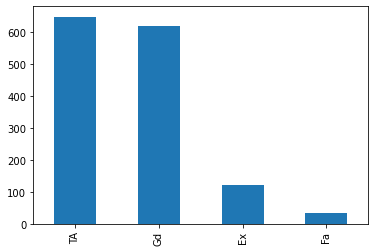

In [9]:
df['BsmtQual'].value_counts().plot.bar()

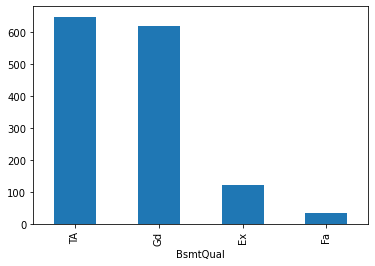

In [10]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

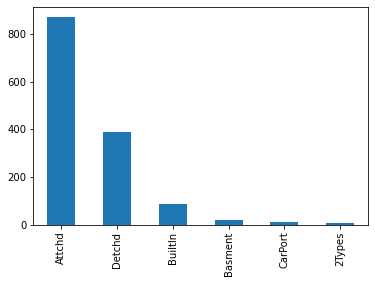

In [11]:
df['GarageType'].value_counts().plot.bar()

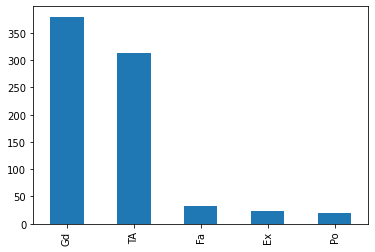

In [12]:
df['FireplaceQu'].value_counts().plot.bar()

In [13]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [14]:
df['GarageType'].mode()[0]

'Attchd'

In [15]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [16]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [17]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

***Advantages:***


1.Easy To implement
2.Fater way to implement 

***Disadvantages***
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
It distorts the relation of the most frequent label

***FROM ABOVE OBSERVATIONS: WHEN WE HAVE LARGE NUMBER OF MISSING VALUES IT IS BAD TO USE THIS METHOD SINCE IT MAY CAUSE 
    IMBALANCE DATA OR FILLED NAN VALUES MAY BE HAVE OVER THAN TRUE VALUE*** 

# 2. Adding a variable to capture NAN

In [18]:
df=pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\HOUSE PRICE PREDICTION\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [20]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [24]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice  BsmtQual_Var
0       Gd         NaN     Attchd     208500             0
1       Gd          TA     Attchd     181500             0
2       Gd          TA     Attchd     223500             0
3       TA          Gd     Detchd     140000             0
4       Gd          TA     Attchd     250000             0

In [32]:
frequent=df['BsmtQual'].mode()[0]

In [34]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [28]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [41]:
df.head()

SalePrice BsmtQualnewvar FireplaceQunewvar GarageTypenewvar
0     208500             Gd           Missing           Attchd
1     181500             Gd                TA           Attchd
2     223500             Gd                TA           Attchd
3     140000             TA                Gd           Detchd
4     250000             Gd                TA           Attchd

*** THE BEOW TECHNIQUE IS MOST USED TECHNIQUE IN INUSTRY ***

# 2.B. Suppose if you have more frequent categories, we just replace NAN with a new category

***HERE WHAT WE DO SUPPOSE IF WE HAVE MORE FREQQUENT CATEGORIES THE SEPERAE WHAT WE DO IS WE MAKE "NAN" AS A SEPERATE CATEGORY***

In [36]:
df=pd.read_csv(r'C:\EXCELR\NOTES WRITTEN\K A G G L E  D A T A\HOUSE PRICE PREDICTION\train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000

In [37]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [38]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [39]:
df.head()

BsmtQual FireplaceQu GarageType  SalePrice BsmtQualnewvar FireplaceQunewvar  \
0       Gd         NaN     Attchd     208500             Gd           Missing   
1       Gd          TA     Attchd     181500             Gd                TA   
2       Gd          TA     Attchd     223500             Gd                TA   
3       TA          Gd     Detchd     140000             TA                Gd   
4       Gd          TA     Attchd     250000             Gd                TA   

  GarageTypenewvar  
0           Attchd  
1           Attchd  
2           Attchd  
3           Detchd  
4           Attchd

In [40]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

SalePrice BsmtQualnewvar FireplaceQunewvar GarageTypenewvar
0     208500             Gd           Missing           Attchd
1     181500             Gd                TA           Attchd
2     223500             Gd                TA           Attchd
3     140000             TA                Gd           Detchd
4     250000             Gd                TA           Attchd